<a href="https://colab.research.google.com/github/Joefamouze/Machine_learning/blob/master/spam_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Spam Classification with Tensorflow-keras


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
%matplotlib inline
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional


In [ ]:
url = 'https://raw.githubusercontent.com/ShresthaSudip/SMS_Spam_Detection_DNN_LSTM_BiLSTM/master/SMSSpamCollection'

In [ ]:
message = pd.read_csv(url, sep='\t', names=["label", "message"])
print(message.shape)
message[:3]

(5572, 2)


,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [ ]:
duplicatedRow = message[message.duplicated()]
print(len(duplicatedRow))
duplicatedRow.head()

403


,label,message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls


In [ ]:
message.groupby('label').describe().T

label                              ham                                               spam
message count                     4825                                                747
        unique                    4516                                                653
        top     Sorry, I'll call later  Please call our customer service representativ...
        freq                        30                                                  4

In [ ]:
ham_msg = message[message.label  == 'ham']
spam_msg = message[message.label == 'spam']

# Create numpy list to visualize using wordcloud
ham_msg_text = "".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = "".join(spam_msg.message.to_numpy().tolist())

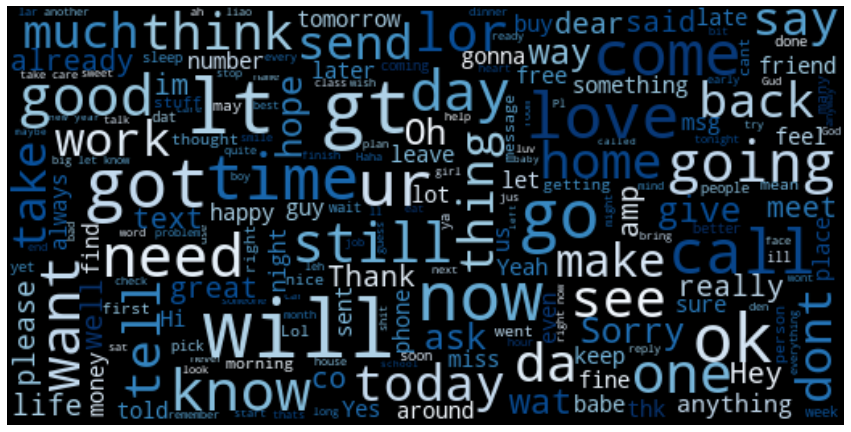

In [ ]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width = 520, height=260, stopwords=STOPWORDS, max_font_size=50, background_color='black', colormap='Blues').generate(ham_msg_text)
plt.figure(figsize=(15, 10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

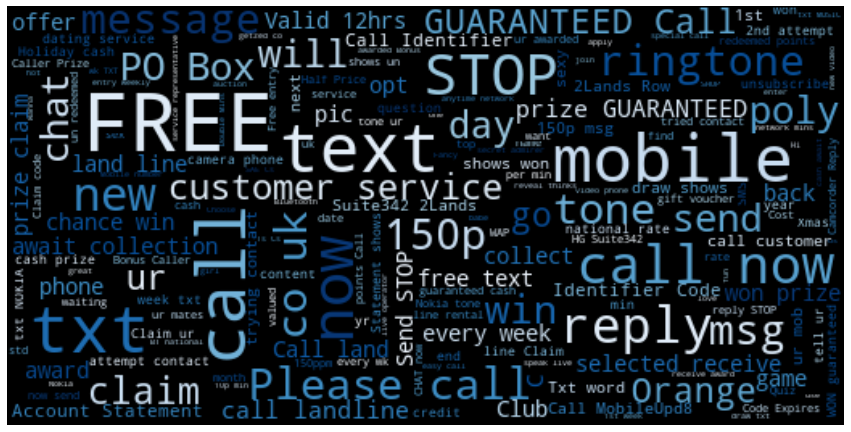

In [ ]:
# wordcloud of ham messages
spam_msg_cloud = WordCloud(width = 520, height=260, stopwords=STOPWORDS, max_font_size=50, background_color='black', colormap='Blues').generate(spam_msg_text)
plt.figure(figsize=(15, 10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


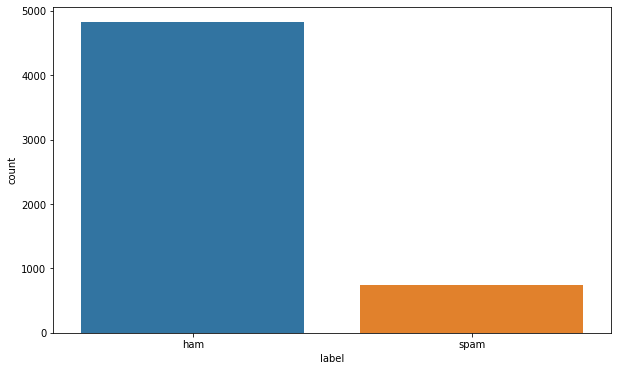

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(message.label)

In [ ]:
# Downsampling Ham messages to equal spam
ham_msg_df = ham_msg.sample(n=len(spam_msg), random_state=44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(747, 2) (747, 2)


In [ ]:
ham_msg_df.head()

,label,message
3234,ham,Height of recycling: Read twice- People spend ...
3804,ham,Yup song bro. No creative. Neva test quality. ...
2701,ham,"Feb &lt;#&gt; is ""I LOVE U"" day. Send dis to..."
2820,ham,Don't forget who owns you and who's private pr...
5161,ham,Lol no. I just need to cash in my nitros. Hurr...


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Message types')

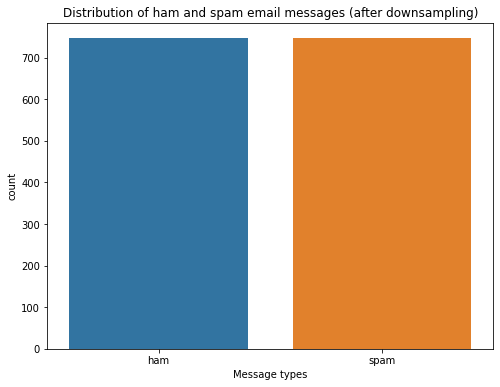

In [ ]:
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8, 6))
sns.countplot(msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')


In [ ]:
msg_df['text_length'] = msg_df['message'].apply(len)
labels = msg_df.groupby('label').mean()
labels

,text_length
label,
ham,73.238286
spam,138.670683


In [ ]:
msg_df['msg_type'] = msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values

In [ ]:
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

In [ ]:
max_len = 50
trunc_type = 'post'
padding_type= 'post'
oov_tok = '<OOV>'
vocab_size = 500

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, char_level=False, oov_token=oov_tok)
tokenizer.fit_on_texts(train_msg)

In [ ]:
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 'is': 11,
 '2': 12,
 'and': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'on': 17,
 'in': 18,
 'ur': 19,
 'have': 20,
 '4': 21,
 'txt': 22,
 'of': 23,
 'are': 24,
 'with': 25,
 'me': 26,
 'from': 27,
 'text': 28,
 'get': 29,
 'my': 30,
 'it': 31,
 'stop': 32,
 'just': 33,
 'mobile': 34,
 'this': 35,
 'will': 36,
 'be': 37,
 'no': 38,
 'that': 39,
 'claim': 40,
 'reply': 41,
 'can': 42,
 'so': 43,
 'send': 44,
 'www': 45,
 'we': 46,
 'only': 47,
 'our': 48,
 'not': 49,
 'out': 50,
 'at': 51,
 'do': 52,
 'if': 53,
 'prize': 54,
 'new': 55,
 'go': 56,
 'cash': 57,
 'but': 58,
 '150p': 59,
 'uk': 60,
 '1': 61,
 'nokia': 62,
 'who': 63,
 't': 64,
 'all': 65,
 'win': 66,
 'please': 67,
 'won': 68,
 'up': 69,
 'tone': 70,
 'when': 71,
 "i'm": 72,
 'week': 73,
 'been': 74,
 'what': 75,
 'msg': 76,
 '50': 77,
 'com': 78,
 'urgent': 79,
 'how': 80,
 'service': 81,
 'phone': 82,
 'time': 83,
 

In [ ]:
total_words = len(word_index)
total_words

4169

In [ ]:
training_seq = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences(training_seq, maxlen=max_len, padding=padding_type, truncating=trunc_type)
testing_seq = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_seq, maxlen=max_len, padding=padding_type, truncating=trunc_type)

In [ ]:
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)


Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [ ]:
training_padded[:1]

array([[  1,  47, 186,   9,  34,   1,   3,  24,   1,   2, 274,   2,   7,
        152, 275, 135,  34,  10,  15,   6,   7,  34, 274,  85,  15,  17,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int32)

In [ ]:
embedding_dim = 20
drop_value = 0.2
n_dense = 30

In [ ]:
model = Sequential([
      Embedding(vocab_size, embedding_dim, input_length=max_len),
      GlobalAveragePooling1D(),
      Dense(n_dense, activation='relu'),
      Dropout(drop_value),
      Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 20)            10000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 31        
Total params: 10,661
Trainable params: 10,661
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=3)

history = model.fit(training_padded, train_labels, epochs=30, validation_data=(testing_padded, test_labels), callbacks=[early_stop], verbose=2)

Epoch 1/30
38/38 - 1s - loss: 0.6896 - accuracy: 0.6494 - val_loss: 0.6839 - val_accuracy: 0.8528
Epoch 2/30
38/38 - 0s - loss: 0.6693 - accuracy: 0.8603 - val_loss: 0.6502 - val_accuracy: 0.8528
Epoch 3/30
38/38 - 0s - loss: 0.6125 - accuracy: 0.8820 - val_loss: 0.5730 - val_accuracy: 0.8595
Epoch 4/30
38/38 - 0s - loss: 0.5162 - accuracy: 0.8921 - val_loss: 0.4701 - val_accuracy: 0.8629
Epoch 5/30
38/38 - 0s - loss: 0.4042 - accuracy: 0.8996 - val_loss: 0.3779 - val_accuracy: 0.8763
Epoch 6/30
38/38 - 0s - loss: 0.3179 - accuracy: 0.9063 - val_loss: 0.3140 - val_accuracy: 0.8863
Epoch 7/30
38/38 - 0s - loss: 0.2563 - accuracy: 0.9180 - val_loss: 0.2617 - val_accuracy: 0.8963
Epoch 8/30
38/38 - 0s - loss: 0.2145 - accuracy: 0.9305 - val_loss: 0.2206 - val_accuracy: 0.9097
Epoch 9/30
38/38 - 0s - loss: 0.1843 - accuracy: 0.9414 - val_loss: 0.1947 - val_accuracy: 0.9097
Epoch 10/30
38/38 - 0s - loss: 0.1594 - accuracy: 0.9456 - val_loss: 0.1766 - val_accuracy: 0.9264
Epoch 11/30
38/38 -

In [ ]:
model.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.1188 - accuracy: 0.9465


[0.11876162886619568, 0.9464883208274841]

In [ ]:
metrics = pd.DataFrame(history.history)
metrics.rename(columns = {'loss': 'Training loss', 'accuracy': 'Training accuracy', 'val_loss': 'validation loss',
                          'val_accuracy': 'Validation accuracy'}, inplace=True)

def plot_graphs1(var1, var2, strings):
  metrics[[var1, var2]].plot()
  plt.title('Training and validation' + strings)
  plt.xlabel('Number of epochs')
  plt.ylabel(strings)
  plt.legend([var1, var2])

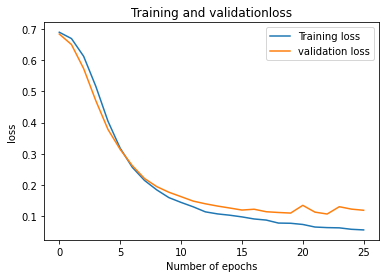

In [ ]:
plot_graphs1('Training loss', 'validation loss', 'loss')

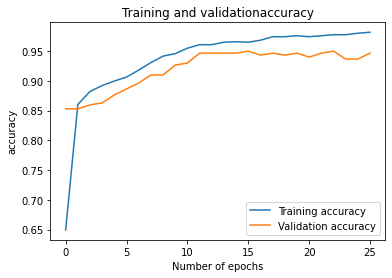

In [ ]:
plot_graphs1('Training accuracy', 'Validation accuracy', 'accuracy')


# Long Short Term Memory LSTM

In [ ]:
# LSTM  hyperparameters
n_lstm = 20
drop_lstm = 0.2

In [ ]:
lstm_model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=max_len),
        LSTM(n_lstm, dropout=drop_lstm, return_sequences=True),
        LSTM(n_lstm, dropout=drop_lstm, return_sequences=True),
        Dense(1, activation='sigmoid')
])

In [ ]:
lstm_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = lstm_model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)


Epoch 1/30
38/38 - 6s - loss: 0.6536 - accuracy: 0.6421 - val_loss: 0.5229 - val_accuracy: 0.7217
Epoch 2/30
38/38 - 1s - loss: 0.3447 - accuracy: 0.8797 - val_loss: 0.2878 - val_accuracy: 0.9123
Epoch 3/30
38/38 - 1s - loss: 0.2532 - accuracy: 0.9220 - val_loss: 0.2317 - val_accuracy: 0.9282
Epoch 4/30
38/38 - 1s - loss: 0.2152 - accuracy: 0.9336 - val_loss: 0.2534 - val_accuracy: 0.9218
Epoch 5/30
38/38 - 1s - loss: 0.1759 - accuracy: 0.9480 - val_loss: 0.2183 - val_accuracy: 0.9288
Epoch 6/30
38/38 - 1s - loss: 0.1615 - accuracy: 0.9485 - val_loss: 0.2373 - val_accuracy: 0.9282
Epoch 7/30
38/38 - 1s - loss: 0.1445 - accuracy: 0.9531 - val_loss: 0.2669 - val_accuracy: 0.9201


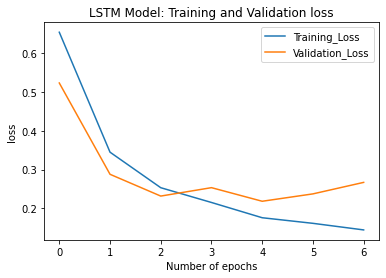

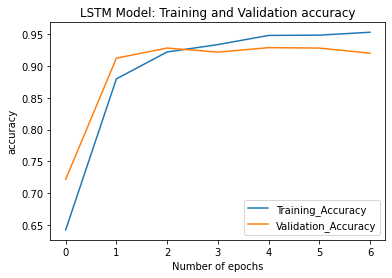

In [ ]:
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

# Model with BiLSTM

In [ ]:
bi_lstm_model = Sequential([
         Embedding(vocab_size, embedding_dim, input_length=max_len),
         Bidirectional(LSTM(n_lstm, dropout=drop_lstm)),
         Dense(1, activation='sigmoid')                   
])

bi_lstm_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [ ]:
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=2)
history = bi_lstm_model.fit(training_padded, train_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)

Epoch 1/30
38/38 - 5s - loss: 0.6812 - accuracy: 0.5774 - val_loss: 0.6386 - val_accuracy: 0.8863
Epoch 2/30
38/38 - 1s - loss: 0.4844 - accuracy: 0.8569 - val_loss: 0.3634 - val_accuracy: 0.8562
Epoch 3/30
38/38 - 1s - loss: 0.2166 - accuracy: 0.9305 - val_loss: 0.1538 - val_accuracy: 0.9465
Epoch 4/30
38/38 - 1s - loss: 0.1375 - accuracy: 0.9540 - val_loss: 0.1517 - val_accuracy: 0.9431
Epoch 5/30
38/38 - 1s - loss: 0.1097 - accuracy: 0.9690 - val_loss: 0.1690 - val_accuracy: 0.9398
Epoch 6/30
38/38 - 1s - loss: 0.0849 - accuracy: 0.9741 - val_loss: 0.1041 - val_accuracy: 0.9599
Epoch 7/30
38/38 - 1s - loss: 0.0715 - accuracy: 0.9782 - val_loss: 0.1296 - val_accuracy: 0.9532
Epoch 8/30
38/38 - 1s - loss: 0.0650 - accuracy: 0.9824 - val_loss: 0.1020 - val_accuracy: 0.9732
Epoch 9/30
38/38 - 1s - loss: 0.0636 - accuracy: 0.9833 - val_loss: 0.1223 - val_accuracy: 0.9565
Epoch 10/30
38/38 - 1s - loss: 0.0467 - accuracy: 0.9891 - val_loss: 0.1255 - val_accuracy: 0.9565


# testing the model


In [ ]:
predict_msg = ['you have won a million dollars, call now', 'call me please', 'what is up with you']


In [ ]:
def predict_spam(predict_msg):
  new_seq = tokenizer.texts_to_sequences(predict_msg)
  padded = pad_sequences(new_seq, maxlen=max_len, padding=padding_type, truncating=trunc_type)
  return (model.predict(padded))


In [ ]:
predict_spam(predict_msg)

array([[0.9534093 ],
       [0.10883743],
       [0.03246477]], dtype=float32)